# Backtest: validation on historical data

<a href="https://mybinder.org/v2/gh/tinkoff-ai/etna/master?filepath=examples/backtest.ipynb">
    <img src="https://mybinder.org/badge_logo.svg"  align='left'>
</a>

This notebook contains the simple examples of time series validation using backtest module of ETNA library.

**Table of Contents**

* [What is backtest and how it works](#chapter1)  
* [How to run a validation](#chapter2)
* [Validation visualisation](#chapter3)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from etna.datasets.tsdataset import TSDataset
from etna.metrics import MAE
from etna.metrics import MSE
from etna.metrics import SMAPE
from etna.pipeline import Pipeline
from etna.models.prophet import ProphetModel
from etna.analysis.plotters import plot_backtest

### 1. What is backtest and how it works <a class="anchor" id="chapter1"></a>

Backtest is a predictions and validation pipeline build on historical data to make a legitimate retrotest of your model.

<b>How does it work?</b>

When constructing a forecast using Models and further evaluating the prediction metrics, we measure the quality at one time interval, designated as test.

Backtest allows you to simulate how the model would work in the past:

* selects a period of time in the past

* builds a model using the selected interval as a training sample

* predicts the value on the test interval and calculates metrics.

The image shows a plot of the backtest pipeline with `n_folds = 3`.

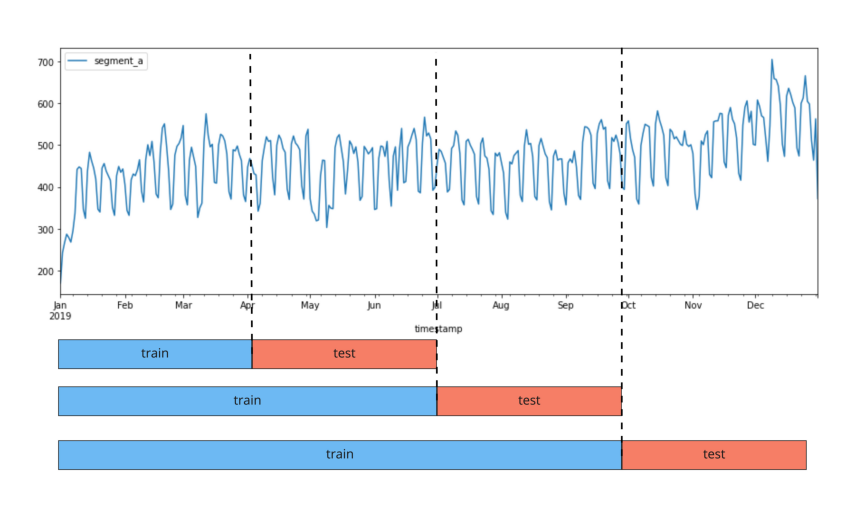

In [2]:
img = plt.imread("./assets/backtest/backtest.jpg")
plt.figure(figsize=(15, 10))
plt.axis('off')
_ = plt.imshow(img)

Below we will call a fold the train + test pair, for which training and forecasting is performed.

In [3]:
df = pd.read_csv("./data/example_dataset.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.loc[df.segment == 'segment_a']
df.head()

,timestamp,segment,target
0,2019-01-01,segment_a,170
1,2019-01-02,segment_a,243
2,2019-01-03,segment_a,267
3,2019-01-04,segment_a,287
4,2019-01-05,segment_a,279


Our library works with the spacial data structure TSDataset. So, before starting the EDA, we need to convert the classical DataFrame to TSDataset.

In [4]:
df = TSDataset.to_dataset(df)
ts = TSDataset(df, freq='D')

#### Let's get a look on series

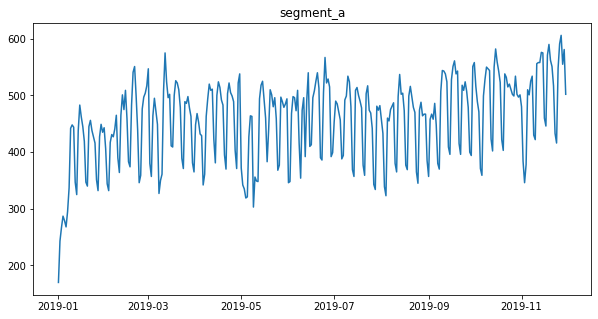

In [5]:
ts.plot(segments=['segment_a'])

### 2. How to run a validation <a class="anchor" id="chapter2"></a>

For an easy start let's create a Prophet model

In [6]:
horizon = 31 # Set the horizon for predictions
model = ProphetModel() # Create a model
transforms = [] #A list of transforms -  we will not use any of them

### `Pipeline` <a class="anchor" id="section_2_1"></a>

Now let's create an instance of `Pipeline`.

In [7]:
pipeline = Pipeline(model=model, transforms=transforms, horizon=horizon)

We are going to run `backtest` method for it. As a result, three dataframes will be returned: 
* dataframe with metrics for each fold and each segment, 
* dataframe with predictions, 
* dataframe with information about folds.

In [8]:
metrics_df, forecast_df, fold_info_df = pipeline.backtest(
    ts=ts, metrics=[MAE(), MSE(), SMAPE()]
)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -7.33119
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      78       351.428    0.00108261       69.8507   1.193e-05       0.001      142  LS failed, Hessian reset 
      99       351.488   4.09565e-05       62.1772       2.498      0.2498      174   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     128       351.504   0.000101895       66.8605   1.806e-06       0.001      245  LS failed, Hessian reset 
     159       351.509   1.25351e-05       49.4763   2.036e-07       0.001      319  LS failed, Hessian reset 
     197        351.51    1.5645e-06       81.3469    2.69e-08       0.001      405  LS failed, Hessian reset 
     199        351.51   4.78958e-07       63.0403      0.6819      0.6819      407   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     232        351.51   6.67546e-09       74.9334       0.181   

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -9.23333
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      96       424.324    0.00270714       109.441   2.893e-05       0.001      183  LS failed, Hessian reset 
      99       424.474    0.00386822        92.942           1           1      186   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     173        424.59     1.904e-08       67.4841      0.3508           1      296   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -10.9227
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       498.209   2.25814e-05       60.9309      0.5061      0.5061      152   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     115       498.224   0.000136267       87.6912   1.629e-06       0.001      205  LS failed, Hessian reset 
     199       498.438   1.30227e-05       67.3973      0.1022      0.1022      322   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     291        498.46   0.000133428       84.1031   1.628e-06       0.001      496  LS failed, Hessian reset 
     299       498.465    4.1561e-06       67.4004      0.3478      0.3478      507   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     353       498.469    1.3736e-08       62.3368      0.2579      0.2579      580   
Optimization terminat

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.5s remaining:    0.0s
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -15.657
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       568.354   0.000399332       67.8296      0.2033      0.2033      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     123       568.573     0.0017271       89.2648   2.448e-05       0.001      220  LS failed, Hessian reset 
     199       569.158   0.000178468        81.409      0.8683      0.8683      313   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       569.418   2.01598e-06       79.9285      0.9891      0.9891      445   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     315       569.418   9.60358e-09        66.104     0.03751      0.3812      468   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.5s remaining:    0.0s
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -12.3458
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       639.632   0.000312261       66.7522           1           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     103        639.65      0.000134       72.6138   1.915e-06       0.001      170  LS failed, Hessian reset 
     124        639.66   2.55787e-05         76.57   3.285e-07       0.001      230  LS failed, Hessian reset 
     151       639.661   2.66896e-08       61.0135      0.2453           1      267   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.6s finished


In [9]:
metrics_df.head()

,segment,MAE,MSE,SMAPE,fold_number
0,segment_a,18.687232,584.674529,4.332255,0
0,segment_a,21.027199,673.267770,4.842942,1
0,segment_a,29.890191,1297.367635,6.254610,2
0,segment_a,35.722208,1972.422737,7.368013,3
0,segment_a,32.022084,1873.437423,6.474391,4


In [10]:
forecast_df.head()

segment      segment_a            
feature         target fold_number
timestamp                         
2019-06-29  394.660779           0
2019-06-30  385.492185           0
2019-07-01  493.005977           0
2019-07-02  509.738716           0
2019-07-03  497.749467           0

In [11]:
fold_info_df.head()

,train_start_time,train_end_time,test_start_time,test_end_time,fold_number
0,2019-01-01,2019-06-28,2019-06-29,2019-07-29,0
0,2019-01-01,2019-07-29,2019-07-30,2019-08-29,1
0,2019-01-01,2019-08-29,2019-08-30,2019-09-29,2
0,2019-01-01,2019-09-29,2019-09-30,2019-10-30,3
0,2019-01-01,2019-10-30,2019-10-31,2019-11-30,4


You can additionally get the metrics averaged over folds:

In [12]:
metrics_df, forecast_df, fold_info_df = pipeline.backtest(
    ts=ts,
    metrics=[MAE(), MSE(), SMAPE()],
    aggregate_metrics=True
)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -7.33119
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      78       351.428    0.00108261       69.8507   1.193e-05       0.001      142  LS failed, Hessian reset 
      99       351.488   4.09565e-05       62.1772       2.498      0.2498      174   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     128       351.504   0.000101895       66.8605   1.806e-06       0.001      245  LS failed, Hessian reset 
     159       351.509   1.25351e-05       49.4763   2.036e-07       0.001      319  LS failed, Hessian reset 
     197        351.51    1.5645e-06       81.3469    2.69e-08       0.001      405  LS failed, Hessian reset 
     199        351.51   4.78958e-07       63.0403      0.6819      0.6819      407   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     232        351.51   6.67546e-09       74.9334       0.181   

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -9.23333
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      96       424.324    0.00270714       109.441   2.893e-05       0.001      183  LS failed, Hessian reset 
      99       424.474    0.00386822        92.942           1           1      186   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     173        424.59     1.904e-08       67.4841      0.3508           1      296   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -10.9227
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       498.209   2.25814e-05       60.9309      0.5061      0.5061      152   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     115       498.224   0.000136267       87.6912   1.629e-06       0.001      205  LS failed, Hessian reset 
     199       498.438   1.30227e-05       67.3973      0.1022      0.1022      322   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     291        498.46   0.000133428       84.1031   1.628e-06       0.001      496  LS failed, Hessian reset 
     299       498.465    4.1561e-06       67.4004      0.3478      0.3478      507   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     353       498.469    1.3736e-08       62.3368      0.2579      0.2579      580   
Optimization terminat

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.3s remaining:    0.0s
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -15.657
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       568.354   0.000399332       67.8296      0.2033      0.2033      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     123       568.573     0.0017271       89.2648   2.448e-05       0.001      220  LS failed, Hessian reset 
     199       569.158   0.000178468        81.409      0.8683      0.8683      313   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       569.418   2.01598e-06       79.9285      0.9891      0.9891      445   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     315       569.418   9.60358e-09        66.104     0.03751      0.3812      468   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.4s remaining:    0.0s
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -12.3458
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       639.632   0.000312261       66.7522           1           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     103        639.65      0.000134       72.6138   1.915e-06       0.001      170  LS failed, Hessian reset 
     124        639.66   2.55787e-05         76.57   3.285e-07       0.001      230  LS failed, Hessian reset 
     151       639.661   2.66896e-08       61.0135      0.2453           1      267   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.4s finished


In [13]:
metrics_df.head()

,segment,MAE,MSE,SMAPE
0,segment_a,27.469783,1280.234019,5.854442


In [14]:
forecast_df.head()

segment      segment_a            
feature         target fold_number
timestamp                         
2019-06-29  394.660779           0
2019-06-30  385.492185           0
2019-07-01  493.005977           0
2019-07-02  509.738716           0
2019-07-03  497.749467           0

In [15]:
fold_info_df.head()

,train_start_time,train_end_time,test_start_time,test_end_time,fold_number
0,2019-01-01,2019-06-28,2019-06-29,2019-07-29,0
0,2019-01-01,2019-07-29,2019-07-30,2019-08-29,1
0,2019-01-01,2019-08-29,2019-08-30,2019-09-29,2
0,2019-01-01,2019-09-29,2019-09-30,2019-10-30,3
0,2019-01-01,2019-10-30,2019-10-31,2019-11-30,4


### 3. Validation visualisation <a class="anchor" id="chapter3"></a>

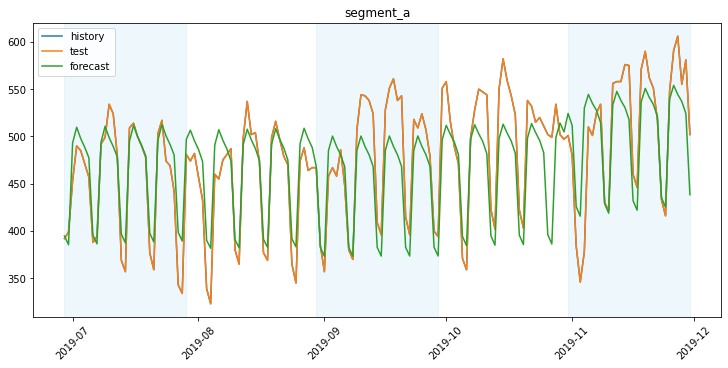

In [16]:
plot_backtest(forecast_df, ts)

Let's see how the data looked before the backtest -  we specify `history_len`.

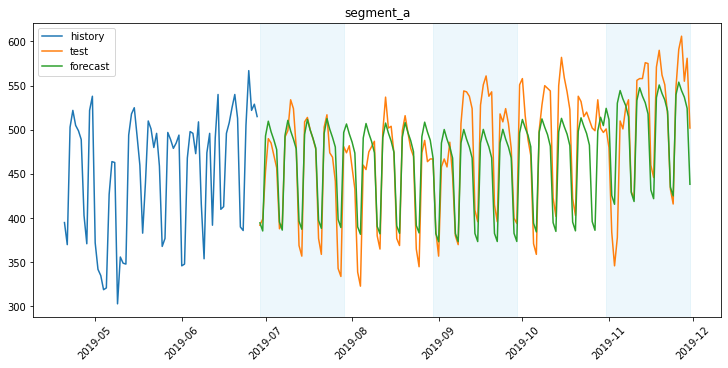

In [17]:
plot_backtest(forecast_df, ts, history_len=70)

That's all for this notebook. More features you can find in our documentation!